In [1]:
!pip install tensorflow
import tensorflow


In [2]:
print(tensorflow.__version__)

2.19.0


In [3]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Hp\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2


In [8]:
DataDir='chest_xray/train'

In [5]:
CATEGORIES=["normal","opacity"]

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

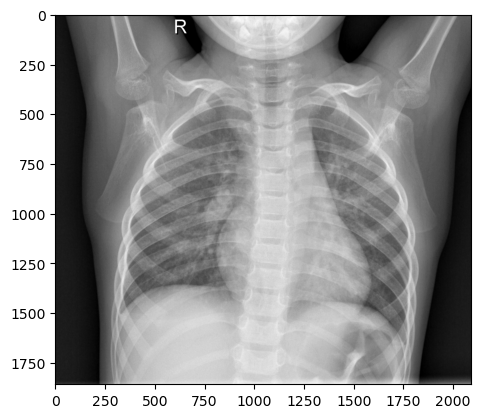

In [9]:
# converting the images into grayscale
for i in CATEGORIES:
    path=os.path.join(DataDir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [10]:
img_size=100

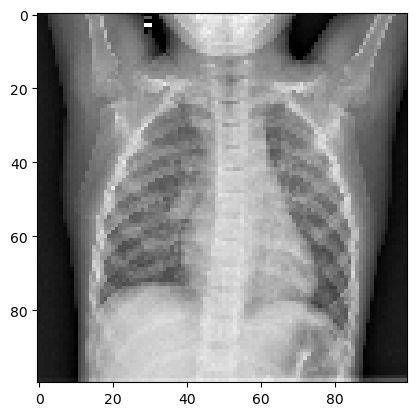

In [11]:
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [12]:
training_data=[]

In [13]:
# defining the function for training data according to the categories converting the images into gray scale with resizing the image into 100 x 100 
# converting it into numpy arrays
def create_training_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            
            except Exception as e:
                pass

In [15]:
create_training_data()

In [16]:
print(len(training_data))

6557


In [17]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample)

[array([[57, 57, 57, ..., 59, 58, 57],
       [54, 63, 61, ..., 57, 60, 54],
       [56, 57, 59, ..., 57, 58, 55],
       ...,
       [13,  9, 42, ..., 14, 15, 16],
       [13, 10, 47, ..., 14, 15, 16],
       [13,  8, 46, ..., 14, 16, 15]], dtype=uint8), 1]
[array([[38, 28, 75, ..., 49, 35, 31],
       [35, 63, 72, ..., 51, 46, 31],
       [30, 76, 69, ..., 54, 52, 37],
       ...,
       [18, 18, 16, ..., 14, 28, 48],
       [18, 17, 16, ..., 12, 25, 53],
       [18, 18, 16, ..., 12, 23, 68]], dtype=uint8), 1]
[array([[211, 184, 200, ...,   0,   0,   0],
       [212, 188, 185, ...,  37,  35,  21],
       [178, 175, 193, ...,  42,  41,  39],
       ...,
       [  0,  32,  55, ...,   0,   0,   0],
       [  0,  38,  53, ...,   1,   0,   0],
       [  0,  41,  57, ...,   3,   0,   0]], dtype=uint8), 0]
[array([[130, 134, 135, ...,  57,  52,  46],
       [137, 142, 143, ...,  76, 104,  55],
       [139, 146, 151, ..., 112, 120, 133],
       ...,
       [  0,   0,   0, ...,   0,   0,   0]

In [18]:
X=[]
y=[]

In [19]:
# spliting the features and labels
for features,label in training_data:
    X.append(features)
    y.append(label)

In [20]:
print(X[0].reshape(-1,img_size,img_size,1))

[[[[57]
   [57]
   [57]
   ...
   [59]
   [58]
   [57]]

  [[54]
   [63]
   [61]
   ...
   [57]
   [60]
   [54]]

  [[56]
   [57]
   [59]
   ...
   [57]
   [58]
   [55]]

  ...

  [[13]
   [ 9]
   [42]
   ...
   [14]
   [15]
   [16]]

  [[13]
   [10]
   [47]
   ...
   [14]
   [15]
   [16]]

  [[13]
   [ 8]
   [46]
   ...
   [14]
   [16]
   [15]]]]


In [21]:
y = np.array(y)

In [22]:
# reshapping the features for making it compatible with tensorflow
X = np.array(X).reshape(-1,img_size,img_size,1)

In [24]:
validation_data=[]
DataDir_val='chest_xray/val'

In [27]:
def create_validating_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir_val,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                validation_data.append([new_array,class_num])
            
            except Exception as e:
                pass

In [28]:
create_validating_data()
print(len(validation_data))

24


In [29]:
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
    print(sample)

[array([[  2, 107,  75, ...,   0,   3,  10],
       [ 59, 105,  51, ...,   2,   0,  21],
       [122,  96,  15, ...,  11,   8,  35],
       ...,
       [  0,   0,  18, ...,   0,   0,   0],
       [  0,   0,  13, ...,   0,   0,   0],
       [  2,   0,  11, ...,   0,   0,   0]], dtype=uint8), 0]
[array([[  2,  56,  64, ...,  16,   7,   2],
       [242,  56,  65, ...,  10,   5,   1],
       [ 49,  59,  63, ...,   7,   4,   0],
       ...,
       [  0,   0,   0, ...,  38,  41,  34],
       [  0,   0,   0, ...,  28,  23,  17],
       [  0,   0,   0, ...,   1,   0,   0]], dtype=uint8), 0]
[array([[ 0,  0,  0, ..., 11,  0,  0],
       [ 5,  4, 17, ..., 10,  0,  0],
       [12, 15, 25, ...,  8,  0,  0],
       ...,
       [ 0,  0,  9, ...,  0,  0,  0],
       [ 0,  0, 10, ...,  0,  0,  0],
       [ 0,  0, 10, ...,  0,  0,  0]], dtype=uint8), 0]
[array([[ 2,  1,  1, ...,  0, 11, 10],
       [ 2,  1,  1, ...,  0, 10,  4],
       [ 2,  1,  2, ..., 18, 10,  0],
       ...,
       [ 7,  6,  5, ...,

In [30]:
X_val=[]
y_val=[]

In [31]:
for features,label in validation_data:
    X_val.append(features)
    y_val.append(label)

In [32]:
y_val = np.array(y_val)
X_val=np.array(X_val).reshape(-1,img_size,img_size,1)

In [33]:
# importing the library for training the model and adding the neural network layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten, Conv2D,MaxPooling2D
import pickle

In [34]:
# Pixels value ranges from 0 to 255, 0 means black, 255 means white....
# In order to scale it down to a scale of 0 to 1, we are performing this step
X = X/255.0
x_val = X_val/255.0

In [35]:
X.shape

(6557, 100, 100, 1)

In [36]:
x_val.shape

(24, 100, 100, 1)

In [42]:
# intializing the neural network layer for training the model
model= Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [43]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 98, 98, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 98, 98, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 47, 47, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 47, 47, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 21, 21, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │       1,638,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,008,193 (7.66 MB)

 Trainable params: 2,008,193 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
# fittting the model with 10 epochs and using the validation data we have created
model.fit(X,y,batch_size=4,epochs=10,validation_data=(x_val, y_val))

Epoch 1/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 122s 73ms/step - accuracy: 0.8001 - loss: 0.4132 - val_accuracy: 0.6667 - val_loss: 0.7752
Epoch 2/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 133s 81ms/step - accuracy: 0.9495 - loss: 0.1475 - val_accuracy: 0.9167 - val_loss: 0.2145
Epoch 3/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 137s 83ms/step - accuracy: 0.9572 - loss: 0.1193 - val_accuracy: 0.8333 - val_loss: 0.3332
Epoch 4/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 147s 90ms/step - accuracy: 0.9651 - loss: 0.0981 - val_accuracy: 1.0000 - val_loss: 0.0375
Epoch 5/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 141s 86ms/step - accuracy: 0.9708 - loss: 0.0781 - val_accuracy: 0.8333 - val_loss: 0.2453
Epoch 6/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 134s 82ms/step - accuracy: 0.9719 - loss: 0.0784 - val_accuracy: 0.7500 - val_loss: 0.3987
Epoch 7/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 139s 85ms/step - accuracy: 0.9777 - loss: 0.0649 - val_accuracy: 0.8333 - val_loss: 0.2873
Epoch 8/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 140s 85ms/step - accuracy: 

In [48]:
model.save("model_10.h5")
model.save('my_model.keras')

In [49]:
# importing the library for testing the model
import cv2 
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

In [50]:
CATEGORIES = ["NORMAL", "PNEUMONIA"]

In [51]:
# function for preparing the image for predicting the class
def prepare(image):
    img_size=100
    #img_array=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    img=tf.keras.preprocessing.image.load_img(image, color_mode='grayscale', target_size=(img_size,img_size))
    new_array=tf.keras.preprocessing.image.img_to_array(img)

    return new_array.reshape(-1,img_size,img_size,1)

In [57]:
model = tf.keras.models.load_model("model_10.h5")

In [63]:
image='chest_xray/test/NORMAL/IM-0001-0001.jpeg'

In [64]:
prediction=model.predict([prepare(image)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
[[0.13749634]]
0
NORMAL


C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_5
Received: inputs=('Tensor(shape=(1, 100, 100, 1))',)
  warnings.warn(msg)


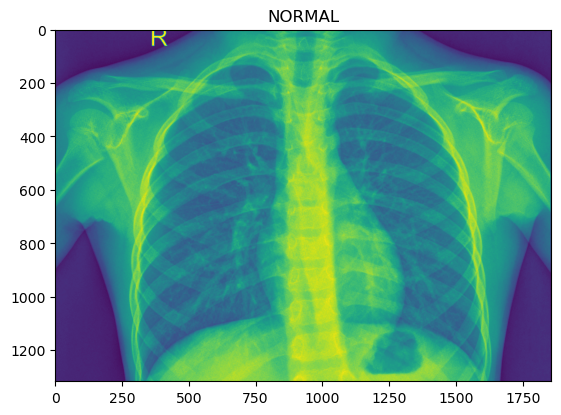

In [65]:
img=mpimg.imread(image)
imgplot=plt.imshow(img)
plt.title(CATEGORIES[int(prediction[0][0])])
plt.show()

In [67]:
# importing necessary libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from keras.models import load_model

# set the path for test data
test_dir = "chest_xray/test"

# define categories
CATEGORIES = ["NORMAL", "PNEUMONIA"]

# set image size
img_size = 100

# load the saved model
model = load_model("model_10.h5")

# initialize lists for storing test data
X_test = []
y_test = []

# loop through the test data directory and extract the images and their labels
for category in CATEGORIES:
    path = os.path.join(test_dir, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_size, img_size))
            X_test.append(new_array)
            y_test.append(class_num)
        except Exception as e:
            pass

# convert test data to numpy arrays
X_test = np.array(X_test).reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

# normalize test data
X_test = X_test / 255.0

# calculate test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

# print test accuracy
print('Test accuracy:', test_acc)


20/20 - 2s - 106ms/step - accuracy: 0.7772 - loss: 1.4544
Test accuracy: 0.7772436141967773
